### Table of Contents
1. Import packages
2. Read file
3. Exploratory Data Analysis
4. Data preprocessing
5. Feature selection
6. Logistic Regression Modelling and model verification
7. Generate Scorecard
8. Predict the probability of default (PD) for the first 300 values in the test set

# Credit Scorecard Model Analysis



- ### Introduction

  This project aims to create a scorecard by predicting the probability that somebody will experience financial distress in the next two years.

  Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit.Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. 

  Finally we will predict the probability of default (PD) for the first 300 values in the test set to show the effectiveness of our model.

- **Project process** 

The main development process of credit risk rating model is as follows:

1. Obtain data and datab description.

2. EDA - exploratory data analysis and descriptive statistics, including the overall data volume, the proportion of good and bad customers, the types of data, the missing rate of variables, variable frequency analysis, histogram visualization, variable correlation visualization, etc.

3. Data preprocessing mainly includes data cleaning, missing value processing, abnormal value processing and so on. We need to convert the original data layer by layer into modelable data.

4. Variable selection
    - Through the methods of statistics and machine learning, select the variables that have the most significant impact on the default state. There are many common variable selection methods, including iv, feature importance, variance and so on. Here, we choose IV value.

    - The main difficulties in model development and scorecard modeling are woe box division, score stretching and variable coefficient calculation. Among them, woe box division is the difficulty in the score card, which requires rich statistical knowledge and business experience.

5. Logistic Regression Modelling- Predict PD

6. Model verification: verify the discrimination ability, prediction ability, stability, sorting ability, etc. of the model, form a model evaluation report, and draw a conclusion whether the model can be used. Model validation is not completed at one time, but after modeling, before and after the model goes online. Model development and maintenance is a cycle, not completed at one time.

7. Generate Scorecard
    - The credit score card is generated according to the variable coefficient and WOE value of Logistic regression. The score card is convenient for business explanation. It has been used for decades and is very stable. It is deeply loved by the financial industry. The method is to convert the probability score of Logistic model into a standard score of 300-900.


8. Predict the probability of default (PD) for the first 300 values in the test set


- ### Data description

This model uses dataset containing 150000 sample data about credit repayment difficulty rates among customers.
  
The variables are :

***SeriousDlqin2yrs:*** 
    Person experienced 90 days past due delinquency or worse (Target variable / label)

***RevolvingUtilizationOfUnsecuredLines:*** 
    Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

***Age:***
    Age of borrower in years

***NumberOfTime30-59DaysPastDueNotWorse:*** 
    Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

***DebtRatio:*** 
    Monthly debt payments, alimony,living costs divided by monthy gross income

***MonthlyIncome:*** 
    Monthly income

***NumberOfOpenCreditLinesAndLoans:*** 
    Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

***NumberOfTimes90DaysLate:*** Number of times borrower has been 90 days or more past due.

***NumberRealEstateLoansOrLines:*** 
    Number of mortgage and real estate loans including home equity lines of credit

***NumberOfTime60-89DaysPastDueNotWorse:*** 
    Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

***NumberOfDependents:*** 
    Number of dependents in family excluding themselves (spouse, children etc.)

### 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import math

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

### 2. Read file

In [2]:
df_train = pd.read_csv("cs-training.csv")

In [3]:
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df_train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### 3. EDA

- Around 6% of samples defaulted
- MonthlyIncome and NumberOfDependents have 29731 (19.82%) and 3924 (2.61%) null values respectively
- We also notice that when NumberOfTimes90DaysLate has values above 17, there are 267 instances where the three columns NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime30-59DaysPastDueNotWorse share the same values, specifically 96 and 98.
    - We can see that sharing the same values of 96 and 98 respectively is not logical since trivial calculations can reveal that being 30 days past due for 96 times for a single person within a timespan of 2 years is not possible.
- RevolvingUtilizationOfUnsecuredLines
    - Defined as ratio of the total amount of money owed to total credit limit
    - distribution of values is right-skewed, consider removing outliers
    - It is expected that as this value increases, the proportion of people defaulting should increase as well
    - However, we can see that as the minimum value of this column is set to 13, the proportion of defaulters is smaller than that belonging to the pool of clients with total amount of money owed not exceeding total credit limit.
    - Thus we should remove those samples with RevolvingUtilizationOfUnsecuredLines's value more than equal to 13
- age
    - There seems to be more younger people defaulting and the distribution seems fine on the whole
- NumberOfTimes90DaysLate
    - It is interesting to note that there are no one who is 90 or more days past due between 17 and 96 times.
- NumberOfTime60-89DaysPastDueNotWorse
    - It is interesting to note that there are no one who is 60-89 days past due between 11 and 96 times.
- NumberOfTime30-59DaysPastDueNotWorse
    - It is interesting to note that there are no one who is 30-59 days past due between 13 and 96 times.
- DebtRatio
    - 2.5% of clients owe around 3490 or more times what they own
    - For the people who have monthly income in this 2.5%, only 185 people have values for their monthly incomes and the values are either 0 or 1.
    - There are 164 out of these 185 people who are of two different types, first with no monthly income and does not default and second with monthly income and does default.
- MonthlyIncome
    - Distribution of values is skewed, we can consider imputation with median.
    - We can also consider imputing with normally distributed values with its mean and standard deviation.
- Numberof Dependents
    - We can consider imputing with its mode, which is zero.

- #### 3.1 Null value

In [6]:
null = df_train.isnull().sum()
pd.DataFrame({"Column": null.index, "Number of Null Values": null.values,
             "Proportion": null.values / len(df_train) })

,Column,Number of Null Values,Proportion
0,Unnamed: 0,0,0.000000
1,SeriousDlqin2yrs,0,0.000000
2,RevolvingUtilizationOfUnsecuredLines,0,0.000000
3,age,0,0.000000
4,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
5,DebtRatio,0,0.000000
6,MonthlyIncome,29731,0.198207
7,NumberOfOpenCreditLinesAndLoans,0,0.000000
8,NumberOfTimes90DaysLate,0,0.000000
9,NumberRealEstateLoansOrLines,0,0.000000


- #### 3.2 Detect outliers

<AxesSubplot:>

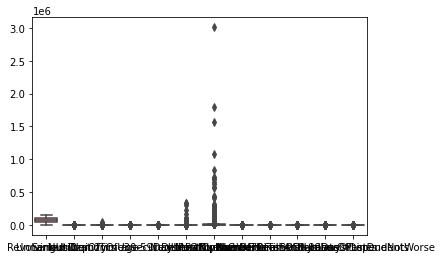

In [7]:
sns.boxplot(data=df_train)

- #### 3.3 SeriousDlqin2yrs -- target variable

  - Person experienced 90 days past due delinquency or worse
  - Around 6% of samples defaulted
  - Based on the data exploration, our target variable appears to be SeriousDlqin2yrs

Default Rate: 0.06684


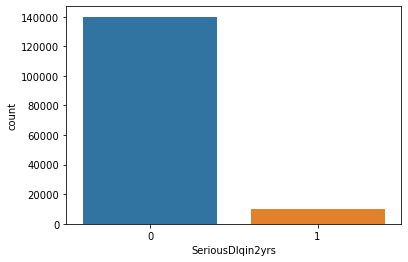

In [8]:
sns.countplot(x="SeriousDlqin2yrs", data=df_train)
print("Default Rate: {}".format(df_train["SeriousDlqin2yrs"].sum() / len(df_train)))

- #### 3.4 Other factore (X)

- **RevolvingUtilizationOfUnsecuredLines**
    - Defined as ratio of the total amount of money owed to total credit limit
    - distribution of values is right-skewed, consider removing outliers
    - It is expected that as this value increases, the proportion of people defaulting should increase as well
    - However, we can see that as the minimum value of this column is set to 13, the proportion of defaulters is smaller than that belonging to the pool of clients with total amount of money owed not exceeding total credit limit.
    - Thus we should remove those samples with RevolvingUtilizationOfUnsecuredLines's value more than equal to 13

In [9]:
df_train["RevolvingUtilizationOfUnsecuredLines"].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [10]:
default_prop = []
for i in range(int(df_train["RevolvingUtilizationOfUnsecuredLines"].max())):
    temp_ = df_train.loc[df_train["RevolvingUtilizationOfUnsecuredLines"] >= i]
    default_prop.append([i, temp_["SeriousDlqin2yrs"].mean()])
default_prop

[[0, 0.06684],
 [1, 0.37177950868783705],
 [2, 0.14555256064690028],
 [3, 0.09931506849315068],
 [4, 0.08679245283018867],
 [5, 0.07874015748031496],
 [6, 0.07692307692307693],
 [7, 0.0778688524590164],
 [8, 0.07407407407407407],
 [9, 0.07053941908713693],
 [10, 0.07053941908713693],
 [11, 0.07053941908713693],
 [12, 0.06666666666666667],
 [13, 0.058823529411764705],
 [14, 0.058823529411764705],
 [15, 0.05531914893617021],
 [16, 0.05531914893617021],
 [17, 0.05531914893617021],
 [18, 0.05531914893617021],
 [19, 0.05555555555555555],
 [20, 0.05555555555555555],
 [21, 0.05555555555555555],
 [22, 0.05555555555555555],
 [23, 0.05555555555555555],
 [24, 0.05555555555555555],
 [25, 0.05555555555555555],
 [26, 0.05555555555555555],
 [27, 0.05555555555555555],
 [28, 0.05555555555555555],
 [29, 0.05555555555555555],
 [30, 0.05150214592274678],
 [31, 0.05150214592274678],
 [32, 0.05150214592274678],
 [33, 0.05150214592274678],
 [34, 0.05150214592274678],
 [35, 0.05150214592274678],
 [36, 0.05150

Text(0.5, 1.0, 'Proportion of Defaulters As Minimum RUUL Increases')

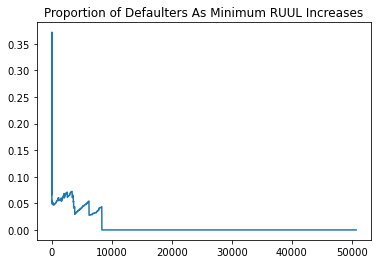

In [11]:
sns.lineplot(x=[i[0] for i in default_prop], y=[i[1] for i in default_prop])
plt.title("Proportion of Defaulters As Minimum RUUL Increases")

In [12]:
print("Proportion of Defaulters with Total Amount of Money Owed Not Exceeding Total Credit Limit: {}"\
     .format(df_train.loc[(df_train["RevolvingUtilizationOfUnsecuredLines"] >= 0) & (df_train["RevolvingUtilizationOfUnsecuredLines"] <= 1)]["SeriousDlqin2yrs"].mean()))

Proportion of Defaulters with Total Amount of Money Owed Not Exceeding Total Credit Limit: 0.05991996127598361


In [13]:
print("Proportion of Defaulters with Total Amount of Money Owed Not Exceeding or Equal to 13 times of Total Credit Limit:\n{}"\
     .format(df_train.loc[(df_train["RevolvingUtilizationOfUnsecuredLines"] >= 0) & (df_train["RevolvingUtilizationOfUnsecuredLines"] < 13)]["SeriousDlqin2yrs"].mean()))

Proportion of Defaulters with Total Amount of Money Owed Not Exceeding or Equal to 13 times of Total Credit Limit:
0.06685273968029273


- **age**
    - There seems to be more younger people defaulting and the distribution seems fine on the whole
    - It can be seen that the age variable is roughly normally distributed, which is in line with the assumptions of statistical analysis.

In [14]:
df_train["age"].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

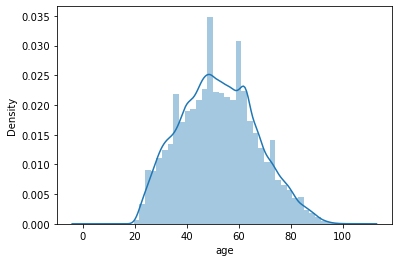

In [15]:
sns.distplot(df_train["age"])

<AxesSubplot:xlabel='age', ylabel='Density'>

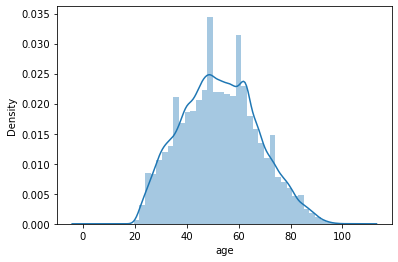

In [16]:
sns.distplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 0]["age"])

<AxesSubplot:xlabel='age', ylabel='Density'>

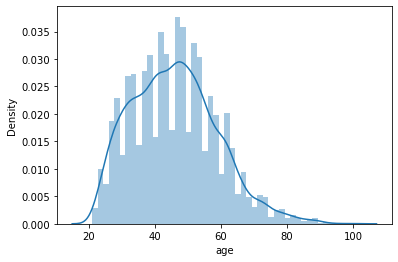

In [17]:
sns.distplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 1]["age"])

- **Late Payment Columns**
  - NumberOfTimes90DaysLate
  - NumberOfTime60-89DaysPastDueNotWorse
  - NumberOfTime30-59DaysPastDueNotWorse
  
   - We can notice that when NumberOfTimes90DaysLate has values above 17, there are 267 instances where the three columns NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime30-59DaysPastDueNotWorse share the same values, specifically 96 and 98.
   
   - We can see that sharing the same values of 96 and 98 respectively is not logical since trivial calculations can reveal that being 30 days past due for 96 times for a single person within a timespan of 2 years is not possible.

In [18]:
df_train["NumberOfTimes90DaysLate"].value_counts().sort_index()
# It is interesting to note that there are no one who is 90 or more days past due between 17 and 96 times.

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [19]:
df_train["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()
# It is interesting to note that there are no one who is 60-89 days past due between 11 and 96 times.

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [20]:
df_train["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index()
# It is interesting to note that there are no one who is 30-59 days past due between 13 and 96 times.

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [21]:
late_pay_cols = ["NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse","NumberOfTime30-59DaysPastDueNotWorse"]
df_train.loc[df_train["NumberOfTimes90DaysLate"] > 17][late_pay_cols].describe()

,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse
count,269.000000,269.000000,269.000000
mean,97.962825,97.962825,97.962825
std,0.270628,0.270628,0.270628
min,96.000000,96.000000,96.000000
25%,98.000000,98.000000,98.000000
50%,98.000000,98.000000,98.000000
75%,98.000000,98.000000,98.000000
max,98.000000,98.000000,98.000000


In [22]:
distinct_triples_counts = dict()
for arr in df_train.loc[df_train["NumberOfTimes90DaysLate"] > 17][late_pay_cols].values:
    triple = ",".join(list(map(str, arr)))
    if triple not in distinct_triples_counts:
        distinct_triples_counts[triple] = 0
    else:
        distinct_triples_counts[triple] += 1
distinct_triples_counts

{'98,98,98': 263, '96,96,96': 4}

- **DebtRatio**
    - 2.5% of clients owe around 3490 or more times what they own
    - For the people who have monthly income in this 2.5%, only 185 people have values for their monthly incomes and the values are either 0 or 1.
    - There are 164 out of these 185 people who are of two different types, first with no monthly income and does not default and second with monthly income and does default.

In [23]:
df_train["DebtRatio"].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [24]:
df_train["DebtRatio"].quantile(0.95)

2449.0

In [25]:
df_train.loc[df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.95)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe()

,DebtRatio,MonthlyIncome,SeriousDlqin2yrs
count,7494.000000,379.000000,7494.000000
mean,4417.958367,0.084433,0.055111
std,7875.314649,0.278403,0.228212
min,2450.000000,0.000000,0.000000
25%,2893.250000,0.000000,0.000000
50%,3491.000000,0.000000,0.000000
75%,4620.000000,0.000000,0.000000
max,329664.000000,1.000000,1.000000


In [26]:
len(df_train[(df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.95)) & (df_train['SeriousDlqin2yrs'] == df_train['MonthlyIncome'])])

331

In [27]:
df_train.loc[df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.95)]["MonthlyIncome"].value_counts()

0.0    347
1.0     32
Name: MonthlyIncome, dtype: int64

In [28]:
print("Number of people who owe around 2449 or more times what they own and have same values for MonthlyIncome and SeriousDlqin2yrs: {}"\
     .format(len(df_train.loc[(df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.95)) & (df_train["MonthlyIncome"] == df_train["SeriousDlqin2yrs"])])))

Number of people who owe around 2449 or more times what they own and have same values for MonthlyIncome and SeriousDlqin2yrs: 331


In [29]:
df_train["DebtRatio"].quantile(0.975)

3489.024999999994

In [30]:
df_train.loc[df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.975)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe()

,DebtRatio,MonthlyIncome,SeriousDlqin2yrs
count,3750.000000,185.000000,3750.000000
mean,5917.488000,0.064865,0.064267
std,10925.524011,0.246956,0.245260
min,3490.000000,0.000000,0.000000
25%,3957.250000,0.000000,0.000000
50%,4619.000000,0.000000,0.000000
75%,5789.500000,0.000000,0.000000
max,329664.000000,1.000000,1.000000


In [31]:
len(df_train[(df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.975)) & (df_train['SeriousDlqin2yrs'] == df_train['MonthlyIncome'])])

164

In [32]:
df_train.loc[df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.975)]["MonthlyIncome"].value_counts()

0.0    173
1.0     12
Name: MonthlyIncome, dtype: int64

In [33]:
print("Number of people who owe around 3490 or more times what they own and have same values for MonthlyIncome and SeriousDlqin2yrs: {}"\
     .format(len(df_train.loc[(df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.975)) & (df_train["MonthlyIncome"] == df_train["SeriousDlqin2yrs"])])))

Number of people who owe around 3490 or more times what they own and have same values for MonthlyIncome and SeriousDlqin2yrs: 164


- **MonthlyIncome**
    - Distribution of values is skewed, we can consider imputation with median.
    - We can also consider imputing with normally distributed values with its mean and standard deviation.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

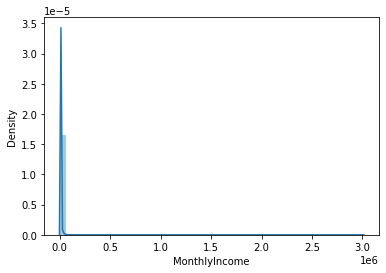

In [34]:
sns.distplot(df_train["MonthlyIncome"].dropna())

In [35]:
df_train["MonthlyIncome"].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

- **NumberOfOpenCreditLinesAndLoans**

In [36]:
df_train["NumberOfOpenCreditLinesAndLoans"].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Density'>

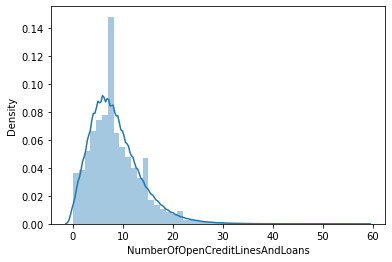

In [37]:
sns.distplot(df_train["NumberOfOpenCreditLinesAndLoans"])

- **NumberRealEstateLoansOrLines**

In [38]:
df_train["NumberRealEstateLoansOrLines"].value_counts()

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
15        7
14        7
17        4
16        4
25        3
18        2
23        2
19        2
20        2
26        1
54        1
21        1
29        1
32        1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [39]:
df_train["NumberRealEstateLoansOrLines"].describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

<AxesSubplot:xlabel='NumberRealEstateLoansOrLines', ylabel='count'>

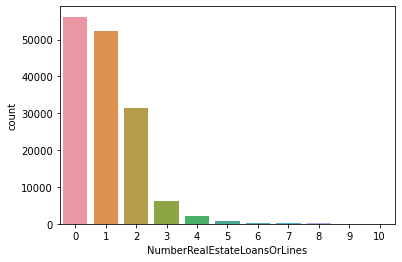

In [40]:
sns.countplot(x="NumberRealEstateLoansOrLines", data=df_train.loc[df_train["NumberRealEstateLoansOrLines"] <= 10])

In [41]:
df_train.loc[df_train["NumberRealEstateLoansOrLines"] > 13]["SeriousDlqin2yrs"].describe()

count    38.000000
mean      0.210526
std       0.413155
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: SeriousDlqin2yrs, dtype: float64

- **NumberOfDependents**
    - We can consider imputing with its mode, which is zero.

In [42]:
df_train["NumberOfDependents"].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

In [43]:
df_train["NumberOfDependents"].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [44]:
df_train.loc[df_train["NumberOfDependents"] <= 10]["SeriousDlqin2yrs"].describe()

count    146074.000000
mean          0.067411
std           0.250733
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

<AxesSubplot:xlabel='NumberOfDependents', ylabel='count'>

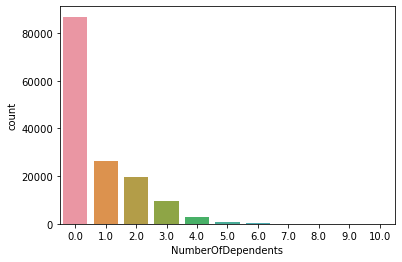

In [45]:
sns.countplot(x="NumberOfDependents", data=df_train.loc[df_train["NumberOfDependents"] <= 10])


### 4. Data preprocessing

#### 4.1 Remove useless column

In [46]:
df_train=df_train.iloc[:,1:] 
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


#### 4.2 Train_test_split 

  - Splitting our data before any data cleaning or missing value imputation prevents any data leakage from the test set to the training set and results in more accurate model evaluation.
  
  - In order to verify the fitting effect of the model, we need to segment the data set into training set and test set.
  
  - Shown before, our data is heavily skewed to 'good'. Accordingly, in addition to random shuffled sampling, we will also stratify the train/test split so that the distribution of good and bad loans in the test set is the same as that in the pre-split data. This is achieved through the train_test_split function’s stratify parameter.




In [47]:
# X = df_train.drop('SeriousDlqin2yrs', axis = 1)
# y = df_train['SeriousDlqin2yrs']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
# train = pd.concat([y_train, X_train], axis=1)
# test = pd.concat([y_test, X_test], axis=1)

In [48]:
# print(X_train.info(),X_test.info())

#### 4.3 missing value handling
  - we use 'median to fill NA value in column 'MonthlyIncome'
  - and use 'mode' to fill NA value  in column 'NumberOfDependents'

In [49]:
df_train['MonthlyIncome'] = df_train['MonthlyIncome'].fillna(df_train['MonthlyIncome'].median())

In [50]:
df_train['NumberOfDependents'] = df_train['NumberOfDependents'].fillna(df_train['NumberOfDependents'].mode()[0])

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

#### 4.4 Outlier handling
   - After the missing value is processed, we also need to process the abnormal value. 
   - Outliers refer to values that deviate significantly from most of the sampling data. For example, when the age of an individual customer is 0, it is generally considered as outliers. 
    
      - We find that there is 0 in the variable age, which is obviously an abnormal value. 
      - For the variables NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse, there are 96 and 98 abnormal value

In [52]:
df_train = df_train[df_train['age'] > 0]

   - For the variables NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse, there are 96 and 98 abnormal values, so they are eliminated. 
   - At the same time, it will be found that if the 96 and 98 values of one variable are eliminated, the 96 and 98 values of other variables will be eliminated accordingly.
   The outliers of the variables numberoftime30-59dayspastduenotword, NumberOfTimes90DaysLate, numberoftime60-89dayspastduenotword are eliminated. 

In [53]:
# df_train = df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse'] < 90]

### 5. Feature selection
  - we will perform feature selection to identify the most suitable features for our binary classification problem.
  
  - we use the WOE analysis method to determine whether the index meets the economic significance by comparing the default probability of the index box and the corresponding box.

  - The correlation between variables is very small. 
  - IV index is generally used to determine the predictive ability of independent variables. The formula is:
    IV=sum((goodattribute-badattribute)*ln(goodattribute/badattribute))
      - The criteria for judging the predictive ability of variables through IV value are:
        
        < 0.02: unpredictive; 0.02 to 0.1: weak; 0.1 to 0.3: medium
        0.3 to 0.5: strong; > 0.5: suspicious


#### 5.1. Data Binning

Need qcut:    equal number in each bin
* RevolvingUtilizationOfUnsecuredLines
* DebtRatio
* MonthlyIncome
* NumberOfOpenCreditLinesAndLoans
* NumberRealEstateLoansOrLines

Need cut:     equal distance
* age
* NumberOfDependents
* NumberOfTime30-59DaysPastDueNotWorse
* NumberOfTimes90DaysLate
* NumberOfTime60-89DaysPastDueNotWorse

In [54]:
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['bin_age'] = pd.cut(df_train['age'],bins=age_bins).astype(str)
dependent_bin = [-math.inf,2,4,6,8,10,math.inf]
df_train['bin_NumberOfDependents'] = pd.cut(df_train['NumberOfDependents'],bins=dependent_bin).astype(str)
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'],bins=dpd_bins)
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'], bins=dpd_bins)


df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop').astype(str)
df_train['bin_DebtRatio'] = pd.qcut(df_train['DebtRatio'],q=5,duplicates='drop').astype(str)
df_train['bin_MonthlyIncome'] = pd.qcut(df_train['MonthlyIncome'],q=5,duplicates='drop').astype(str)
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop').astype(str)
df_train['bin_NumberRealEstateLoansOrLines'] = pd.qcut(df_train['NumberRealEstateLoansOrLines'],q=5,duplicates='drop').astype(str)

In [55]:
bin_cols = [c for c in df_train.columns.values if c.startswith('bin_')]

#### 5.2 Correalated parameters as reference

In [56]:
# corr = df_train.corr()
# xticks = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
# yticks = list(corr.index)
# fig = plt.figure()
# ax1 = fig.add_subplot()
# sns.heatmap(corr, annot=True, cmap='rainbow', ax=ax1, annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})
# ax1.set_xticklabels(xticks, rotation=0, fontsize=10)
# ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
# plt.show()

#### 5.3 IV

In [57]:
def cal_IV(df, feature, target):
    lst = []
    cols=['Variable', 'Value', 'All', 'Bad']
    for i in range(df[feature].nunique()):
        
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], 
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() 
                                                               - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Bad'] / data['Distribution Good'])
    data['IV'] = (data['WoE'] * (data['Distribution Bad'] 
                                 - data['Distribution Good'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    return data['IV'].values[0]

In [58]:
for f in bin_cols:
    print(f)
    print(cal_IV(df_train,f,'SeriousDlqin2yrs'))

bin_age
0.24042153713595646
bin_NumberOfDependents
0.014507830948465108
bin_NumberOfTimes90DaysLate
0.4916054889400023
bin_NumberOfTime30-59DaysPastDueNotWorse
0.49244257596382357
bin_NumberOfTime60-89DaysPastDueNotWorse
0.2665579639141889
bin_RevolvingUtilizationOfUnsecuredLines
1.0596123457462057
bin_DebtRatio
0.05948663403796267
bin_MonthlyIncome
0.05623323174560775
bin_NumberOfOpenCreditLinesAndLoans
0.04802154282362793
bin_NumberRealEstateLoansOrLines
0.012088881652202014


We choose those parameters with IV>0.1,they are：
* bin_RevolvingUtilizationOfUnsecuredLines
* bin_NumberOfTime30-59DaysPastDueNotWorse	
* bin_age
* bin_NumberOfTimes90DaysLate
* bin_NumberOfTime60-89DaysPastDueNotWorse	

#### 5.4 WOE

In [59]:
def cal_WOE(df,features,target):
    df_new = df
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad'})
        df_woe = df_woe.rename(columns = {target+'count':'all'})
        df_woe['good'] = df_woe['all']-df_woe['bad']
        df_woe = df_woe[[f,'good','bad']]
        df_woe['bad_rate'] = df_woe['bad'].mask(df_woe['bad']==0, 1)/df_woe['bad'].sum() # mask 0 to 1 to avoid log(0)
        df_woe['good_rate'] = df_woe['good']/df_woe['good'].sum()
        
        df_woe['woe'] = np.log(df_woe['bad_rate'].divide(df_woe['good_rate'],fill_value=1))
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe,on=f,how='left')
    return df_new 

In [60]:
feature_cols = ['RevolvingUtilizationOfUnsecuredLines','NumberOfTime30-59DaysPastDueNotWorse','age','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']
bin_cols = ['bin_RevolvingUtilizationOfUnsecuredLines','bin_NumberOfTime30-59DaysPastDueNotWorse','bin_age','bin_NumberOfTimes90DaysLate','bin_NumberOfTime60-89DaysPastDueNotWorse']
df_woe = cal_WOE(df_train,bin_cols,'SeriousDlqin2yrs')
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
df_woe[woe_cols]

,woe_bin_RevolvingUtilizationOfUnsecuredLines,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_age,woe_bin_NumberOfTimes90DaysLate,woe_bin_NumberOfTime60-89DaysPastDueNotWorse
0,1.242247,1.616719,0.228336,-0.176674,-0.09799
1,1.242247,-0.257826,0.469540,-0.176674,-0.09799
2,0.053157,-0.257826,0.469540,-0.176674,-0.09799
3,-0.866474,-0.257826,0.469540,-0.176674,-0.09799
4,1.242247,-0.257826,0.228336,-0.176674,-0.09799
...,...,...,...,...,...
149994,-1.447389,-0.257826,-1.132152,-0.176674,-0.09799
149995,0.053157,-0.257826,0.228336,-0.176674,-0.09799
149996,-0.866474,-0.257826,-0.084789,-0.176674,-0.09799
149997,-1.286624,-0.257826,0.469540,-0.176674,-0.09799


In [61]:
df_bin_to_woe = pd.DataFrame(columns = ['features','bin','woe'])
for f in feature_cols:
    b = 'bin_'+f
    w = 'woe_bin_'+f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df=df[['features','bin','woe']]
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])
df_bin_to_woe

,features,bin,woe
0,RevolvingUtilizationOfUnsecuredLines,"(0.699, 50708.0]",1.242247
2,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",0.053157
3,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",-0.866474
11,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0192]",-1.286624
14,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",-1.447389
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.616719
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-0.257826
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.027488
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.336862
191,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",2.436778


### 6. Logistic Regression Modelling- Predict PD

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size=0.2, random_state=42)

In [63]:
print('bad rate is: ',y_train.mean())

bad rate is:  0.06722556021300177


In [64]:
# Tried SMOTE sampling here, but had no effect, so I commented it out
# from imblearn.over_sampling import SMOTE 
# sm = SMOTE(random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)
# print('bad rate is: ',y_train.mean())

In [65]:
X_train.describe()

,woe_bin_RevolvingUtilizationOfUnsecuredLines,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_age,woe_bin_NumberOfTimes90DaysLate,woe_bin_NumberOfTime60-89DaysPastDueNotWorse
count,119999.000000,119999.000000,119999.000000,119999.000000,119999.000000
mean,-0.461560,-0.144130,-0.113832,-0.114443,-0.062269
std,0.997523,0.486860,0.540385,0.431589,0.317978
min,-1.447389,-0.257826,-1.132152,-0.176674,-0.097990
25%,-1.286624,-0.257826,-0.689010,-0.176674,-0.097990
50%,-0.866474,-0.257826,-0.084789,-0.176674,-0.097990
75%,0.053157,-0.257826,0.228336,-0.176674,-0.097990
max,1.242247,2.846424,0.562389,4.124345,3.734880


In [66]:
model = LogisticRegression(random_state=42).fit(X_train,y_train)

In [67]:
# Look at performance on validation sets
model.score(X_test,y_test)

0.9365

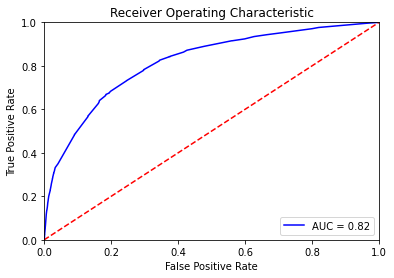

In [68]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [69]:
# Confusion matrix
y_pred = model.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[27880,   161],
       [ 1744,   215]])

In [70]:
model.coef_

array([[0.76974231, 0.59477935, 0.48326162, 0.5809755 , 0.3413589 ]])

### 7. Generate Scorecard
  - In order to compute A and B, we need set two parameters:
    1. Benchmark score. Let's make θ_0 = 20:1, most risk control strategies have a base score of 650,so we use 650 here. 
       
       Basescore = A-B \ theta_0
       
    2. PDO (Point of double), the change value of score when the ratio is doubled. Let's say we set it so that when we double the odds, the score goes down by 30.


In [71]:
A = 650
B =72.13

In [72]:
def generate_scorecard(model_coef,binning_df,features,B):
    lst = []
    cols = ['Variable','Binning','Score']
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]
        df = binning_df[binning_df['features']==f]
        for index,row in df.iterrows():
            lst.append([f,row['bin'],int(round(-coef[i]*row['woe']*B))])
    data = pd.DataFrame(lst, columns=cols)
    return data

In [73]:
score_card = generate_scorecard(model.coef_,df_bin_to_woe,feature_cols,B)
score_card

,Variable,Binning,Score
0,RevolvingUtilizationOfUnsecuredLines,"(0.699, 50708.0]",-69
1,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",-3
2,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",48
3,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0192]",71
4,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",80
5,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-69
6,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",11
7,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-87
8,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-100
9,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",-105


In [74]:
sort_scorecard = score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending=False))
sort_scorecard

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 6   NumberOfTime30-59DaysPastDueNotWorse   
                                     5   NumberOfTime30-59DaysPastDueNotWorse   
                                     13  NumberOfTime30-59DaysPastDueNotWorse   
                                     14  NumberOfTime30-59DaysPastDueNotWorse   
                                     7   NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     10  NumberOfTime30-59DaysPastDueNotWorse   
                                     12  NumberOfTime30-59DaysPastDueNotWorse   
                                     11  NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 31  NumberOfTime60-89DaysPastDueNotWorse   
                                     32  NumberOfTime60-89DaysPastDueNotWorse   
                                     39  NumberOfTime60-89DaysPastDueNotWorse   
                                     40  NumberOfTime60-89DaysPastDueNotWorse   
                                     35  NumberOfTime60-89DaysPastDueNotWorse   
                                     38  NumberOfTime60-89DaysPastDueNotWorse   
                                     34  NumberOfTime60-89DaysPastDueNotWorse   
                                     33  NumberOfTime60-89DaysPastDueNotWorse   
                                     36  NumberOfTime60-89DaysPastDueNotWorse   
                                     37  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              21               NumberOfTimes90DaysLate   
                                     23               NumberOfTimes90DaysLate   
                                     26               NumberOfTimes90DaysLate   
                                     22               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
                                     24               NumberOfTimes90DaysLate   
                                     25               NumberOfTimes90DaysLate   
                                     30               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 4   RevolvingUtilizationOfUnsecuredLines   
                                     3   RevolvingUtilizationOfUnsecuredLines   
                                     2   RevolvingUtilizationOfUnsecuredLines   
                                     1   RevolvingUtilizationOfUnsecuredLines   
                                     0   RevolvingUtilizationOfUnsecuredLines   
age                                  17                                   age   
                                     19                                   age   
                                     18                                   age   
                                     15                                   age   
                                     16                                   age   
                                     20                                   age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 6        (-inf, 1.0]     11  
                                     5         (1.0, 2.0]    -69  
                                     13        (7.0, 8.0]    -81  
                                     14        (8.0, 9.0]    -83  
                                     7         (2.0, 3.0]    -87  
                                     8         (3.0, 4.0]   -100  
                                     9         (4

As you can see, overall the scores are as expected.For example, the higher the RevolvingUtilizationOfUnsecuredLines,the lower the score.

### 8. Predict the probability of default (PD) for the first 300 values in the test set

In [75]:
# The purpose of this code is to map the input data to the sub-box and select the corresponding score value to calculate the final credit score
def str_to_int(s):
    if s == '-inf':
        return -999999999.0
    elif s=='inf':
        return 999999999.0
    else:
        return float(s)
    
def map_value_to_bin(feature_value,feature_to_bin):
    for idx, row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        left_open = bins[0]=="("
        right_open = bins[-1]==")"
        binnings = bins[1:-1].split(',')
        in_range = True
        # check left bound
        if left_open:
            if feature_value<= str_to_int(binnings[0]):
                in_range = False   
        else:
            if feature_value< str_to_int(binnings[0]):
                in_range = False   
        #check right bound
        if right_open:
            if feature_value>= str_to_int(binnings[1]):
                in_range = False 
        else:
            if feature_value> str_to_int(binnings[1]):
                in_range = False   
        if in_range:
            return row['Binning']
    return null

def map_to_score(df,score_card):
    scored_columns = list(score_card['Variable'].unique())
    score = 0
    for col in scored_columns:
        feature_to_bin = score_card[score_card['Variable']==col]
        feature_value = df[col]
        selected_bin = map_value_to_bin(feature_value,feature_to_bin)
        selected_record_in_scorecard = feature_to_bin[feature_to_bin['Binning']==selected_bin]
        score += selected_record_in_scorecard['Score'].iloc[0]
    return score  

def calculate_score_with_card(df,score_card,A):
    df['score'] = df.apply(map_to_score,args=(score_card,),axis=1)
    df['score'] = df['score']+A
    df['score'] = df['score'].astype(int)
    return df

In [76]:
good_sample = df_train[df_train['SeriousDlqin2yrs']==0].sample(5, random_state=1)
good_sample = good_sample[feature_cols]
bad_sample = df_train[df_train['SeriousDlqin2yrs']==1].sample(5, random_state=1)
bad_sample = bad_sample[feature_cols]

In [77]:
calculate_score_with_card(good_sample,score_card,A)

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,age,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,score
94594,0.021363,0,43,0,0,742
115913,0.022457,0,53,0,0,753
70341,0.039704,0,72,0,0,789
6741,0.013976,0,57,0,0,744
140107,0.092714,0,58,0,0,721


In [78]:
calculate_score_with_card(bad_sample,score_card,A)

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,age,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,score
86741,1.000000,0,49,0,0,593
137326,0.612609,2,53,0,0,590
79696,0.608164,5,56,1,0,554
87970,0.964554,1,30,0,1,585
120547,0.940120,0,38,1,1,585


As can be seen, the score of the good sample is lower than the score of the bad sample, indicating the effectiveness of the scorecard. For example, in the example above, the good samples all scored above 500, and the bad samples all scored below 500. Although changing some samples may not be accurate, but in general, we can identify more bad customers.

- ### Predict the first 300 values in the test set

In [79]:
df_test = pd.read_csv("cs-test.csv")

In [80]:
df_test=df_test.iloc[:300]

In [81]:
null_test = df_test.isnull().sum()
pd.DataFrame({"Column": null_test.index, "Number of Null Values": null_test.values,
             "Proportion": null_test.values / len(df_test) })

,Column,Number of Null Values,Proportion
0,Unnamed: 0,0,0.000000
1,SeriousDlqin2yrs,300,1.000000
2,RevolvingUtilizationOfUnsecuredLines,0,0.000000
3,age,0,0.000000
4,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
5,DebtRatio,0,0.000000
6,MonthlyIncome,58,0.193333
7,NumberOfOpenCreditLinesAndLoans,0,0.000000
8,NumberOfTimes90DaysLate,0,0.000000
9,NumberRealEstateLoansOrLines,0,0.000000


In [82]:
df_test = df_test[feature_cols]

In [83]:
calculate_score_with_card(df_test,score_card,A)


,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,age,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,score
0,0.885519,0,43,0,0,593
1,0.463295,0,57,0,0,670
2,0.043275,0,59,0,0,753
3,0.280308,1,38,0,0,651
4,1.000000,0,27,0,0,585
...,...,...,...,...,...,...
295,0.243359,0,41,0,0,710
296,0.000000,0,63,0,0,765
297,0.359217,0,56,0,0,670
298,0.069994,0,72,0,0,789


### 10. Summary 
In this project, through the process of data mining and analysis with our training dataset, combined with the establishment principle of credit scoring card, from data preprocessing, variable selection, modeling and analysis to creating credit scoring, a simple credit scoring system is created.

But there are still some improvement need to be done in the future:
- Try to use other data binning method to see whether we can get better results;
- Fill NA value using random forest or other possible methods;
- Try other other models like Neural network to see whether can predict the result better;
